# Exercise 6 – Pandas Basics

In [1]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2021
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.

In [2]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 150

In [4]:
#Import Pandas
import pandas as pd

In [5]:
#Creating a dictionary with some table data in it.
dict = {
    'Name':['Tom', 'Dick', 'Harry'],
    'Age':[24, 35, 29],
    'Shoe Size':[7,8,9]
}

In [6]:
#Creating a DataFrame with the data from the dictionary
df=pd.DataFrame(dict)

In [7]:
#The dataframe can be viewed without the print() command.
df

,Name,Age,Shoe Size
0,Tom,24,7
1,Dick,35,8
2,Harry,29,9


In [8]:
#Write the data from the DataFrame to a file
df.to_csv('people.csv')

In [9]:
# Now I want to read the data, lets create a new DataFrame. Remember to specify an index column!
my_data=pd.read_csv('people.csv', index_col=0)

In [10]:
#have a look at the data
my_data

,Name,Age,Shoe Size
0,Tom,24,7
1,Dick,35,8
2,Harry,29,9


# Read in SimFin data

## First Getting Stock Data
Get csv data from [simfin.com](https://simfin.com/data/bulk). The following download settings were used.

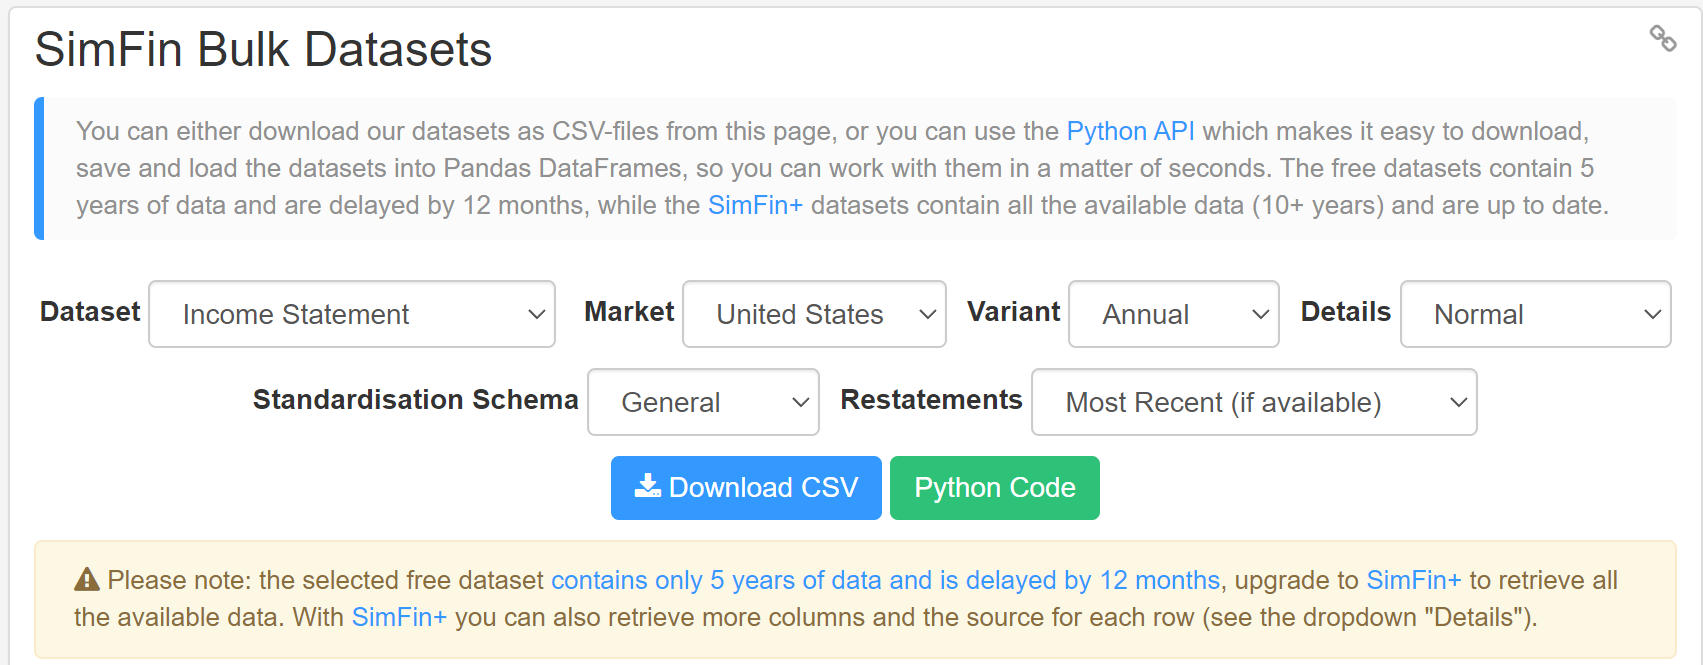

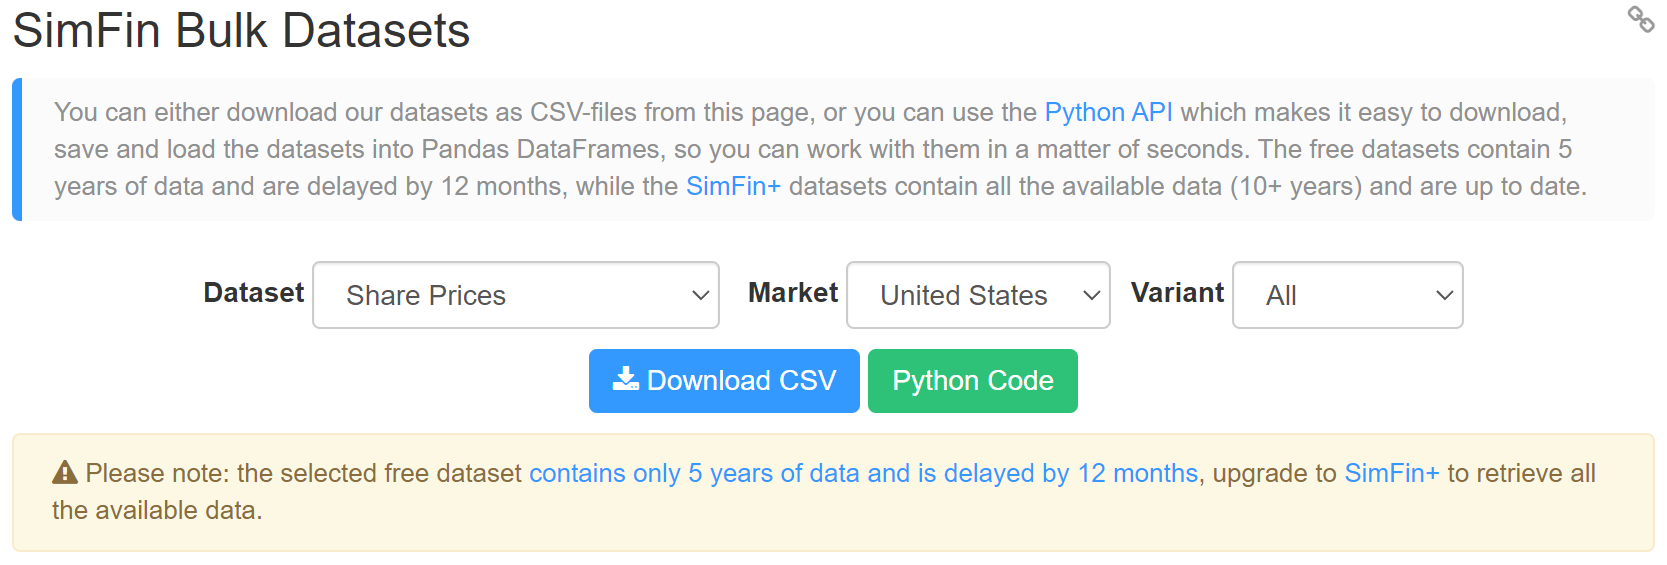

In [12]:
# Lets read some income statement data from SimFin (https://simfin.com/)
# Your download directory will differ.

# You can specify a full directory address
#fullDirectoryAddr = 'C:\Users\Damon\OneDrive\BYO_Investing_AI\2025\VIML_V7\JUPYTERNOTEBOOKS_collection_2024_working\Chapter_3_Intro_to_Python_Solutions\us-income-annual.csv'

# Or, if reading from current directory
currDirectoryAddr = 'us-income-annual.csv'

# Reading the .csv file into a DataFrame
Income_Data = pd.read_csv(currDirectoryAddr, 
                          delimiter=';')

In [13]:
# Get the DataFrame shape (Might be useful for other computation)
print('DataFrame shape is: ',Income_Data.shape)
# Have a look at what our DataFrame looks like
Income_Data
# You will notice that thefirst few and last few items are shown (Jupyter doesn't want to display all 15,124 rows.)

DataFrame shape is:  (15311, 28)


,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,9.190000e+08,NaN,9.190000e+08,152000000.0,1071000000,NaN,1071000000,1071000000
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,309000000.0,312000000.0,...,-4000000.0,-70000000.0,8.420000e+08,NaN,8.420000e+08,-123000000.0,719000000,NaN,719000000,719000000
2,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,305000000.0,307000000.0,...,13000000.0,-79000000.0,1.360000e+09,NaN,1.360000e+09,-150000000.0,1210000000,NaN,1210000000,1210000000
3,A,45846,USD,2022,FY,2022-10-31,2022-12-21,2023-12-20,304000000.0,307000000.0,...,-114000000.0,-75000000.0,1.504000e+09,NaN,1.504000e+09,-250000000.0,1254000000,NaN,1254000000,1254000000
4,A,45846,USD,2023,FY,2023-10-31,2023-12-20,2023-12-20,294000000.0,296000000.0,...,-11000000.0,-44000000.0,1.339000e+09,NaN,1.339000e+09,-99000000.0,1240000000,NaN,1240000000,1240000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15306,ZYNE,901704,USD,2022,FY,2022-12-31,2023-03-28,2023-03-28,43746878.0,43746878.0,...,215734.0,846860.0,-3.503581e+07,NaN,-3.503581e+07,NaN,-35035806,NaN,-35035806,-35035806
15307,ZYXI,171401,USD,2019,FY,2019-12-31,2020-02-27,2021-02-25,35682900.0,37359300.0,...,-5000.0,-5000.0,1.106100e+07,880000.0,1.194100e+07,-2449000.0,9492000,NaN,9492000,9492000
15308,ZYXI,171401,USD,2020,FY,2020-12-31,2021-02-25,2022-03-22,37255900.0,38437300.0,...,-19000.0,-19000.0,1.023000e+07,-77000.0,1.015300e+07,-1079000.0,9074000,NaN,9074000,9074000
15309,ZYXI,171401,USD,2021,FY,2021-12-31,2022-03-22,2023-03-14,37255900.0,38437300.0,...,-95000.0,-95000.0,2.227100e+07,NaN,2.227100e+07,-5168000.0,17103000,NaN,17103000,17103000


In [15]:
# The headings of columns are called keys. 
# The columns themselves are called series.
# To see what all the columns are in our dataframe, use the .keys() function. 
print(Income_Data.keys())

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')


In [17]:
# To see series data for a single key:
Income_Data['Ticker']

0           A
1           A
2           A
3           A
4           A
         ... 
15306    ZYNE
15307    ZYXI
15308    ZYXI
15309    ZYXI
15310    ZYXI
Name: Ticker, Length: 15311, dtype: object

In [18]:
Income_Data['Report Date']

0        2019-10-31
1        2020-10-31
2        2021-10-31
3        2022-10-31
4        2023-10-31
            ...    
15306    2022-12-31
15307    2019-12-31
15308    2020-12-31
15309    2021-12-31
15310    2022-12-31
Name: Report Date, Length: 15311, dtype: object

In [19]:
print('The resulting type of object from our series selection is a:', 
      type(Income_Data['Report Date']) )

print('using .values after our selection turns this into a:', 
      type(Income_Data['Report Date'].values) )

The resulting type of object from our series selection is a: <class 'pandas.core.series.Series'>
using .values after our selection turns this into a: <class 'numpy.ndarray'>


In [20]:
# To get a list of tickers that exist, we could use the set operations we learned earlier.
my_set = set(Income_Data['Ticker'].values)
print(my_set)

{'KFY', 'PEB', 'DALN', 'LASR', 'MIR', 'RUN', 'CLRB', 'CLSK', 'UWMC', 'PVAC', 'THS', 'GRNT', 'WYNN', 'SRC', 'KURA', 'TPCO', 'EEX', 'VCEL', 'RHT', 'PSIX', 'CCH', 'MTAC', 'CRGY', 'ONDK', 'ARES', 'SORL', 'LGF-B', 'AVAC', 'IRM', 'PNYG', 'VPG', 'AVEO', 'ETR', 'BBW', 'ALSK', 'AMP', 'MAA', 'SHLX', 'VICR', 'LGIH', 'ALTR', 'MPC', 'ALTM', 'WTW', 'EQIX', 'TTI', 'DSP', 'TGLO', 'CIFR', 'RBBN', 'ENO', 'EPAM', 'MSGE', 'SLP', 'CAH', 'ESPR', 'REFR', 'YELP', 'VHI', 'ETM', 'IGNY', 'BTBT', 'VMI', 'MOV', 'ABNB', 'NWBO', 'SC', 'RXST', 'RGP', 'DECK', 'GSHD', 'ALRM', 'AH', 'MQ', 'RIGL', 'SFM', 'PETS', 'RADA', 'NI', 'CMI', 'IVC', 'YMAB', 'EXLS', 'OLO', 'PHIN', 'SNOA', 'SRE', 'ADUS', 'GGAA', 'OSUR', 'PAYO', 'TCRR', 'POR', 'SGLB', 'HWM', 'SCWO', 'STRT', 'CSII', 'JAMF', 'SIRI', 'GLUU', 'LE', 'LUNA', 'NTAP', 'PANL', 'RENN', 'TECH', 'GTIM', 'PLAB', 'CDAY', 'PDLI', 'NRG', 'HUBG', 'SMMT', 'AGYS', 'CRD-A', 'KNOP', 'CALM', 'TDS', 'ROOT', 'ICHR', 'MRIN', 'BKUH', 'HUBS', 'RH', 'CNXN', 'CPK', 'CLBR', 'RLGY', 'FIX', 'AOSL',

In [21]:
len(my_set)

4331

In [22]:
#Alternatively a dataframe has a function .unique()
Income_Data['Ticker'].unique()

array(['A', 'A21', 'AA', ..., 'ZYME', 'ZYNE', 'ZYXI'], dtype=object)

In [25]:
# You can use logic on dataframes to obtain a list of boolean values that say whether a rule is True or False for each row.
# Let's try and isolate financial data for the 2017 fiscal period. 
# We will do a boolean check on items in the 'Fiscal Year' column:

IsIt2017 = (Income_Data['Fiscal Year'] == 2020)
print('The boolean logic on the Fiscal Year column is: ', IsIt2017)

The boolean logic on the Fiscal Year column is:  0        False
1         True
2        False
3        False
4        False
         ...  
15306    False
15307    False
15308     True
15309    False
15310    False
Name: Fiscal Year, Length: 15311, dtype: bool


In [26]:
# We can use this list of booleans to make a smaller dataframe with only data from fiscal year 2017 as follows:
Income_Data[IsIt2017]

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,3.090000e+08,3.120000e+08,...,-4000000.0,-70000000.0,842000000.0,NaN,842000000.0,-123000000.0,719000000,NaN,719000000,719000000
6,A21,1333027,USD,2020,FY,2020-12-31,2021-03-10,2023-04-21,1.853320e+09,2.115376e+09,...,208133000.0,-66916000.0,-461204000.0,272327000.0,-188877000.0,22847000.0,-166030000,14373000.0,-151657000,-791985000
8,AA,367153,USD,2020,FY,2020-12-31,2021-02-25,2023-02-23,1.860000e+08,1.860000e+08,...,-154000000.0,-146000000.0,277000000.0,-104000000.0,173000000.0,-187000000.0,-14000000,NaN,-170000000,-170000000
15,AAGH,12444287,USD,2020,FY,2020-06-30,2020-10-12,2022-01-21,2.023602e+10,2.023602e+10,...,-4965.0,-4965.0,-51116.0,NaN,-51116.0,-800.0,-51916,NaN,-51916,-51916
20,AAIC,9076064,USD,2020,FY,2020-12-31,2021-02-26,2022-03-10,3.534300e+07,3.534300e+07,...,-22916000.0,-22916000.0,10483000.0,-78199000.0,-67716000.0,NaN,-67716000,NaN,-67716000,-70707000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,ZVO,901866,USD,2020,FY,2020-12-31,2021-02-24,2022-04-15,3.195900e+07,3.195900e+07,...,-120000.0,NaN,-2380000.0,-59640000.0,-62020000.0,13068000.0,-48952000,NaN,-48952000,-48952000
15298,ZY,1243193,USD,2020,FY,2020-12-31,2021-03-30,2022-03-30,1.299634e+07,1.334046e+07,...,-10925000.0,-10468000.0,-252014000.0,-10229000.0,-262243000.0,49000.0,-262194000,NaN,-262194000,-262194000
15301,ZYME,17663790,USD,2020,FY,2020-12-31,2021-02-24,2022-02-24,5.038250e+07,5.038250e+07,...,7345000.0,5697000.0,-180123000.0,NaN,-180123000.0,-429000.0,-180552000,NaN,-180552000,-180552000
15304,ZYNE,901704,USD,2020,FY,2020-12-31,2021-03-10,2023-03-28,2.702293e+07,2.702293e+07,...,725711.0,243992.0,-51336831.0,NaN,-51336831.0,NaN,-51336831,NaN,-51336831,-51336831


In [29]:
# Or if we want to do this kind of filter in a single line:
Income_Data[Income_Data['Fiscal Year'] == 2020]
# Which is basically: 'I want the rows of Income_Data where the Income_Data Fiscal Year column is 2017.'
# Notice there are only 1,726 rows instead of 15,125

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,3.090000e+08,3.120000e+08,...,-4000000.0,-70000000.0,842000000.0,NaN,842000000.0,-123000000.0,719000000,NaN,719000000,719000000
6,A21,1333027,USD,2020,FY,2020-12-31,2021-03-10,2023-04-21,1.853320e+09,2.115376e+09,...,208133000.0,-66916000.0,-461204000.0,272327000.0,-188877000.0,22847000.0,-166030000,14373000.0,-151657000,-791985000
8,AA,367153,USD,2020,FY,2020-12-31,2021-02-25,2023-02-23,1.860000e+08,1.860000e+08,...,-154000000.0,-146000000.0,277000000.0,-104000000.0,173000000.0,-187000000.0,-14000000,NaN,-170000000,-170000000
15,AAGH,12444287,USD,2020,FY,2020-06-30,2020-10-12,2022-01-21,2.023602e+10,2.023602e+10,...,-4965.0,-4965.0,-51116.0,NaN,-51116.0,-800.0,-51916,NaN,-51916,-51916
20,AAIC,9076064,USD,2020,FY,2020-12-31,2021-02-26,2022-03-10,3.534300e+07,3.534300e+07,...,-22916000.0,-22916000.0,10483000.0,-78199000.0,-67716000.0,NaN,-67716000,NaN,-67716000,-70707000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15294,ZVO,901866,USD,2020,FY,2020-12-31,2021-02-24,2022-04-15,3.195900e+07,3.195900e+07,...,-120000.0,NaN,-2380000.0,-59640000.0,-62020000.0,13068000.0,-48952000,NaN,-48952000,-48952000
15298,ZY,1243193,USD,2020,FY,2020-12-31,2021-03-30,2022-03-30,1.299634e+07,1.334046e+07,...,-10925000.0,-10468000.0,-252014000.0,-10229000.0,-262243000.0,49000.0,-262194000,NaN,-262194000,-262194000
15301,ZYME,17663790,USD,2020,FY,2020-12-31,2021-02-24,2022-02-24,5.038250e+07,5.038250e+07,...,7345000.0,5697000.0,-180123000.0,NaN,-180123000.0,-429000.0,-180552000,NaN,-180552000,-180552000
15304,ZYNE,901704,USD,2020,FY,2020-12-31,2021-03-10,2023-03-28,2.702293e+07,2.702293e+07,...,725711.0,243992.0,-51336831.0,NaN,-51336831.0,NaN,-51336831,NaN,-51336831,-51336831


In [30]:
# Separate out all reports from 2017 only
# And company with profit above $1000.
IsIt2017 = (Income_Data['Fiscal Year'] == 2020)
HasIncome = (Income_Data['Net Income'] >= 1000)
Income_Data[HasIncome & IsIt2017]

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,3.090000e+08,3.120000e+08,...,-4000000.0,-70000000.0,8.420000e+08,NaN,8.420000e+08,-1.230000e+08,719000000,NaN,719000000,719000000
28,AAMC,847094,USD,2020,FY,2020-12-31,2021-03-03,2022-03-31,2.773254e+06,2.773254e+06,...,6559000.0,NaN,-1.395100e+07,NaN,-1.395100e+07,-7.690000e+05,-14720000,54541000.0,39821000,39779000
40,AAON,919501,USD,2020,FY,2020-12-31,2021-02-25,2023-02-27,7.825302e+07,7.959175e+07,...,139000.0,88000.0,9.549700e+07,6478000.0,1.019750e+08,-2.296600e+07,79009000,NaN,79009000,79009000
44,AAP,184955,USD,2020,FY,2020-12-31,2021-02-22,2023-02-28,6.874800e+07,6.900300e+07,...,-50870000.0,-46886000.0,6.990370e+08,-48022000.0,6.510150e+08,-1.579940e+08,493021000,NaN,493021000,493021000
48,AAPL,111052,USD,2020,FY,2020-09-30,2020-10-30,2022-10-28,1.735212e+10,1.752821e+10,...,803000000.0,NaN,6.709100e+10,NaN,6.709100e+10,-9.680000e+09,57411000000,NaN,57411000000,57411000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15232,ZIP,10384225,USD,2020,FY,2020-12-31,2021-03-03,2023-02-27,9.672600e+07,9.672600e+07,...,-95000.0,-1037000.0,6.433700e+07,NaN,6.433700e+07,2.171100e+07,86048000,NaN,86048000,63017000
15245,ZM,963384,USD,2020,FY,2021-01-31,2021-03-18,2023-03-03,2.838537e+08,2.981277e+08,...,15648000.0,NaN,6.754960e+08,2538000.0,6.780340e+08,-5.718000e+06,672316000,NaN,672316000,671527000
15272,ZTS,378251,USD,2020,FY,2020-12-31,2021-02-16,2023-02-14,4.755020e+08,4.785690e+08,...,-248000000.0,-231000000.0,2.021000e+09,-25000000.0,1.996000e+09,-3.600000e+08,1636000000,NaN,1638000000,1638000000
15277,ZUMZ,45730,USD,2020,FY,2021-01-31,2021-03-15,2022-03-14,2.494200e+07,2.539800e+07,...,5519000.0,3518000.0,1.024570e+08,NaN,1.024570e+08,-2.623000e+07,76227000,NaN,76227000,76227000


In [31]:
# Let's order the stocks for financial year 2017 by net income.
# Within a DataFrame the rows can be ordered as follows:
Income_Data.sort_values(by=['Net Income'])

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
13243,TDAC,11795238,USD,2021,FY,2021-12-31,2022-04-01,2023-06-15,4.032420e+05,5.983850e+05,...,-2.269697e+10,-1.978945e+10,-5.257498e+10,-2.000000e+09,-5.457498e+10,1.664335e+09,-52910646000,NaN,-53047570000,-53048225000
397,AESE,11034472,USD,2020,FY,2020-12-31,2021-04-13,2022-05-26,2.868736e+07,2.868736e+07,...,-5.372568e+09,-5.548583e+09,-2.536436e+10,-2.041998e+10,-4.578434e+10,NaN,-45784338000,725508000.0,-45058830000,-45058830000
2740,CEMI,1253180,USD,2021,FY,2021-12-31,2022-03-03,2023-03-29,2.670155e+07,2.670155e+07,...,-2.912415e+09,-2.912415e+09,-2.691780e+10,-7.047779e+09,-3.396558e+10,6.205000e+07,-33903529000,NaN,-33903529000,-33903529000
2739,CEMI,1253180,USD,2020,FY,2020-12-31,2021-03-11,2022-03-03,1.908569e+07,1.908569e+07,...,-2.841830e+09,-2.841830e+09,-2.479232e+10,-1.185807e+09,-2.597812e+10,4.567940e+08,-25521328000,NaN,-25521328000,-25521328000
557,AITX,13626505,USD,2020,FY,2020-01-31,2020-05-16,2018-06-14,3.656424e+08,NaN,...,-1.241188e+10,-1.241188e+10,-1.536515e+10,-8.883849e+09,-2.424900e+10,NaN,-24249001000,NaN,-24249001000,-24249001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,AAPL,111052,USD,2021,FY,2021-09-30,2021-10-29,2023-11-03,1.639172e+10,1.651929e+10,...,2.580000e+08,NaN,1.092070e+11,NaN,1.092070e+11,-1.452700e+10,94680000000,NaN,94680000000,94680000000
51,AAPL,111052,USD,2023,FY,2023-09-30,2023-11-03,2024-11-01,1.574423e+10,1.581255e+10,...,-5.650000e+08,NaN,1.137360e+11,NaN,1.137360e+11,-1.674100e+10,96995000000,NaN,96995000000,96995000000
50,AAPL,111052,USD,2022,FY,2022-09-30,2022-10-28,2024-11-01,1.621596e+10,1.632582e+10,...,-3.340000e+08,NaN,1.191030e+11,NaN,1.191030e+11,-1.930000e+10,99803000000,NaN,99803000000,99803000000
10220,PAAS,3308037,USD,2019,FY,2019-12-31,2020-02-18,2021-02-18,1.533150e+08,1.535220e+08,...,5.041900e+10,-2.928200e+10,2.076730e+11,-2.516100e+10,1.825120e+11,-7.126800e+10,111244000000,NaN,111244000000,111244000000


In [32]:
# However, we wish to perform this for only the 2017 fiscal year. 
# Fortunately you can just put one operations in front of the other as follows:
Income_Data[Income_Data['Fiscal Year'] == 2020].sort_values(by=['Net Income'])
# It looks like AAPL and BRKA earned the most money that year, more than $40bn!

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
397,AESE,11034472,USD,2020,FY,2020-12-31,2021-04-13,2022-05-26,2.868736e+07,2.868736e+07,...,-5.372568e+09,-5.548583e+09,-2.536436e+10,-2.041998e+10,-4.578434e+10,NaN,-45784338000,725508000.0,-45058830000,-45058830000
2739,CEMI,1253180,USD,2020,FY,2020-12-31,2021-03-11,2022-03-03,1.908569e+07,1.908569e+07,...,-2.841830e+09,-2.841830e+09,-2.479232e+10,-1.185807e+09,-2.597812e+10,4.567940e+08,-25521328000,NaN,-25521328000,-25521328000
557,AITX,13626505,USD,2020,FY,2020-01-31,2020-05-16,2018-06-14,3.656424e+08,NaN,...,-1.241188e+10,-1.241188e+10,-1.536515e+10,-8.883849e+09,-2.424900e+10,NaN,-24249001000,NaN,-24249001000,-24249001000
167,ACER,1053636,USD,2020,FY,2020-12-31,2021-03-01,2022-03-02,1.112104e+07,1.112104e+07,...,-1.193053e+10,-1.184790e+10,-2.288545e+10,NaN,-2.288545e+10,NaN,-22885449000,NaN,-22885449000,-22885449000
15079,XOM,121214,USD,2020,FY,2020-12-31,2021-02-24,2023-02-22,4.271000e+09,4.271000e+09,...,-2.554800e+10,-1.158000e+09,-2.888300e+10,NaN,-2.888300e+10,5.632000e+09,-23251000000,NaN,-22440000000,-22440000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,META,121021,USD,2020,FY,2020-12-31,2021-01-28,2023-02-02,2.851000e+09,2.888000e+09,...,5.090000e+08,NaN,3.318000e+10,NaN,3.318000e+10,-4.034000e+09,29146000000,NaN,29146000000,29146000000
5961,GOOG,18,USD,2020,FY,2020-12-31,2021-02-03,2023-02-03,1.361632e+10,1.466420e+10,...,6.858000e+09,NaN,4.808200e+10,NaN,4.808200e+10,-7.813000e+09,40269000000,NaN,40269000000,40269000000
2254,BRK-A,71306,USD,2020,FY,2020-12-31,2021-03-01,2023-02-27,3.188892e+06,3.188892e+06,...,-8.222000e+09,-4.083000e+09,3.841600e+10,1.727700e+10,5.569300e+10,-1.244000e+10,43253000000,NaN,42521000000,42521000000
9050,MSFT,59265,USD,2020,FY,2020-06-30,2020-07-30,2022-07-28,7.610000e+09,7.683000e+09,...,7.700000e+07,NaN,5.303600e+10,NaN,5.303600e+10,-8.755000e+09,44281000000,NaN,44281000000,44281000000


<Axes: >

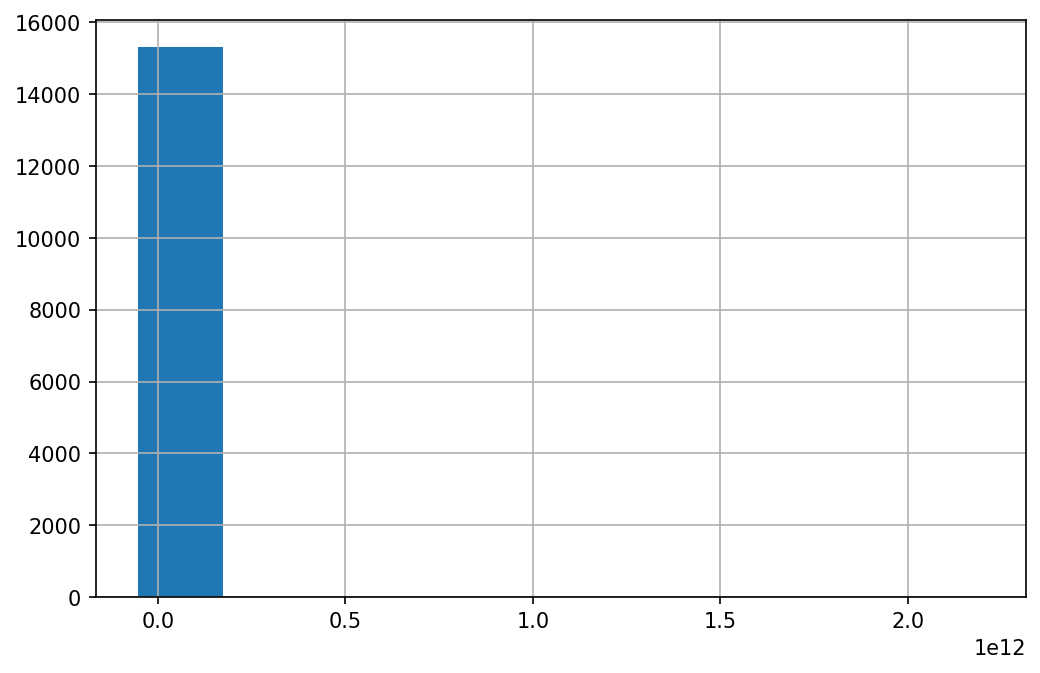

In [33]:
# Lets plot the distribution of net income for all american companies:
Income_Data['Net Income'].hist()

Max profit value was: $ 57.411 Billion


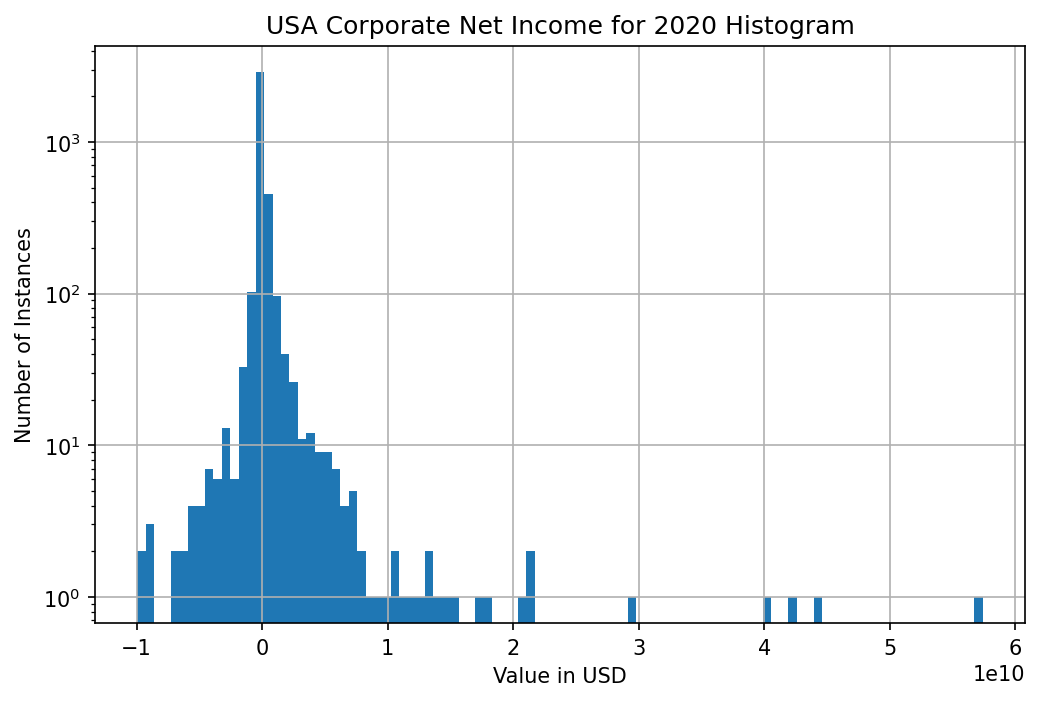

In [34]:
# Plot graph with just 2020 FY data, logarithmic Y axis and more bins for greater resolution.
from matplotlib import pyplot as plt # Import plotting library

# Boolean mask for year 2020 data only.
Year2020Only = (Income_Data['Fiscal Year'] == 2020)

# Boolean mask for Companies with greater than -$10Bn profit
reasonableProfit = (Income_Data['Net Income'] >= -1e10)

# Use the booklean masks and plot the data
Income_Data[Year2020Only&reasonableProfit]['Net Income'].hist(bins=100, 
                                                              log=True)
plt.title('USA Corporate Net Income for 2020 Histogram')
plt.xlabel('Value in USD')
plt.ylabel('Number of Instances')

print('Max profit value was: $', Income_Data[Year2020Only&reasonableProfit]['Net Income'].max()/1e9,'Billion')

In [35]:
# Find the top 10 USA companies by net income, 2020.
Income_Data[Year2020Only&reasonableProfit][['Ticker',
                                            'Currency',
                                            'Fiscal Year', 
                                            'Report Date',
                                            'Publish Date',
                                            'Restated Date',
                                            'Net Income']].sort_values(by=['Net Income'], ascending=False).head(10)

,Ticker,Currency,Fiscal Year,Report Date,Publish Date,Restated Date,Net Income
48,AAPL,USD,2020,2020-09-30,2020-10-30,2022-10-28,57411000000
9050,MSFT,USD,2020,2020-06-30,2020-07-30,2022-07-28,44281000000
2254,BRK-A,USD,2020,2020-12-31,2021-03-01,2023-02-27,42521000000
5961,GOOG,USD,2020,2020-12-31,2021-02-03,2023-02-03,40269000000
8660,META,USD,2020,2020-12-31,2021-01-28,2023-02-02,29146000000
929,AMZN,USD,2020,2020-12-31,2021-02-03,2023-02-03,21331000000
13500,TM,USD,2020,2021-03-31,2021-06-24,2023-06-30,21173000785
7070,INTC,USD,2020,2020-12-31,2021-01-22,2023-01-27,20899000000
14646,VZ,USD,2020,2020-12-31,2021-02-25,2023-02-10,17801000000
13739,TSM,USD,2020,2020-12-31,2021-04-16,2023-04-20,17259932256


In [36]:
# Statistical data can be calculated with the dataframe .describe() function
Income_Data.describe()

,SimFinId,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
count,1.531100e+04,15311.000000,1.520800e+04,1.508000e+04,1.377000e+04,1.211400e+04,1.211700e+04,1.528200e+04,1.449900e+04,7.063000e+03,...,1.507500e+04,1.342400e+04,1.530800e+04,9.856000e+03,1.530900e+04,1.231300e+04,1.531100e+04,1.537000e+03,1.531100e+04,1.531100e+04
mean,4.468163e+06,2020.540592,3.463572e+08,1.004428e+11,6.690915e+09,-4.818015e+09,2.617420e+09,-1.419721e+09,-9.039777e+08,-8.364982e+08,...,-1.067563e+08,-1.386178e+08,7.058814e+08,-4.920701e+07,5.645830e+08,-1.693934e+08,5.122249e+08,8.132280e+07,5.110854e+08,5.079314e+08
std,5.209399e+06,1.200548,7.158914e+09,8.688941e+12,1.129678e+11,7.147056e+10,4.944634e+10,1.923269e+10,1.902534e+10,4.390327e+10,...,4.138361e+09,3.938230e+09,2.228221e+10,3.775173e+09,2.452835e+10,4.671614e+09,1.812614e+10,8.301896e+08,1.809470e+10,1.809450e+10
min,1.800000e+01,2018.000000,1.000000e+00,1.000000e+00,-1.995696e+09,-7.546180e+12,-5.685000e+09,-2.255977e+12,-2.255977e+12,-3.687609e+12,...,-3.692580e+11,-4.524700e+11,-5.257498e+10,-3.045300e+10,-1.267413e+12,-5.054560e+11,-5.291065e+10,-1.732400e+10,-5.304757e+10,-5.304822e+10
25%,4.459200e+05,2020.000000,1.911930e+07,1.997850e+07,1.085782e+08,-1.847400e+09,6.284900e+07,-6.909882e+08,-4.004880e+08,-1.240000e+08,...,-4.541200e+07,-6.474775e+07,-3.089850e+07,-4.019725e+07,-4.187887e+07,-4.830000e+07,-4.174900e+07,-8.545000e+06,-4.118950e+07,-4.225250e+07
50%,1.056222e+06,2021.000000,4.879714e+07,5.053100e+07,6.508305e+08,-3.880875e+08,3.143140e+08,-1.929390e+08,-9.920800e+07,-4.176500e+07,...,-4.075000e+06,-9.103000e+06,4.709734e+06,-4.296869e+06,1.940771e+06,-4.000000e+06,1.360238e+06,4.000000e+04,1.340000e+06,9.556950e+05
75%,1.038340e+07,2022.000000,1.289999e+08,1.327386e+08,2.890645e+09,-5.984750e+07,1.191705e+09,-4.843058e+07,-2.198750e+07,-1.132250e+07,...,1.294335e+05,-2.267620e+05,1.876702e+08,7.515000e+05,1.665020e+08,-8.000000e+03,1.379140e+08,2.400000e+07,1.328150e+08,1.314540e+08
max,1.814544e+07,2023.000000,6.769000e+11,7.590000e+14,1.288225e+13,4.205710e+08,5.336070e+12,9.470000e+08,4.362800e+07,1.190660e+08,...,9.408625e+10,2.379591e+09,2.710835e+12,2.809990e+11,2.710835e+12,8.502000e+09,2.205379e+12,1.335600e+10,2.201565e+12,2.201565e+12


In [37]:
# You can create new dataframes from filtered old dataframes.
# Let's separate the 2017 fiscal year data to a new dataframe.
Income_Data_2020 = Income_Data[Income_Data['Fiscal Year'] == 2020]

In [38]:
Income_Data_2020.head(9)

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,3.090000e+08,3.120000e+08,...,-4.000000e+06,-7.000000e+07,8.420000e+08,NaN,8.420000e+08,-1.230000e+08,719000000,NaN,719000000,719000000
6,A21,1333027,USD,2020,FY,2020-12-31,2021-03-10,2023-04-21,1.853320e+09,2.115376e+09,...,2.081330e+08,-6.691600e+07,-4.612040e+08,272327000.0,-1.888770e+08,2.284700e+07,-166030000,14373000.0,-151657000,-791985000
8,AA,367153,USD,2020,FY,2020-12-31,2021-02-25,2023-02-23,1.860000e+08,1.860000e+08,...,-1.540000e+08,-1.460000e+08,2.770000e+08,-104000000.0,1.730000e+08,-1.870000e+08,-14000000,NaN,-170000000,-170000000
15,AAGH,12444287,USD,2020,FY,2020-06-30,2020-10-12,2022-01-21,2.023602e+10,2.023602e+10,...,-4.965000e+03,-4.965000e+03,-5.111600e+04,NaN,-5.111600e+04,-8.000000e+02,-51916,NaN,-51916,-51916
20,AAIC,9076064,USD,2020,FY,2020-12-31,2021-02-26,2022-03-10,3.534300e+07,3.534300e+07,...,-2.291600e+07,-2.291600e+07,1.048300e+07,-78199000.0,-6.771600e+07,NaN,-67716000,NaN,-67716000,-70707000
24,AAL,68568,USD,2020,FY,2020-12-31,2021-02-17,2023-02-22,4.838880e+08,4.838880e+08,...,-1.032000e+09,-1.186000e+09,-1.145300e+10,NaN,-1.145300e+10,2.568000e+09,-8885000000,NaN,-8885000000,-8885000000
28,AAMC,847094,USD,2020,FY,2020-12-31,2021-03-03,2022-03-31,2.773254e+06,2.773254e+06,...,6.559000e+06,NaN,-1.395100e+07,NaN,-1.395100e+07,-7.690000e+05,-14720000,54541000.0,39821000,39779000
32,AAN,441241,USD,2020,FY,2020-12-31,2021-02-23,2023-03-01,3.387700e+07,3.387700e+07,...,-7.697000e+06,-1.000600e+07,-3.977309e+08,-565342000.0,-3.978140e+08,1.319020e+08,-265912000,NaN,-265912000,-265912000
36,AAOI,671827,USD,2020,FY,2020-12-31,2021-02-25,2023-02-27,2.186663e+07,2.186663e+07,...,-2.382000e+06,-5.380000e+06,-5.122400e+07,NaN,-5.122400e+07,-7.228000e+06,-58452000,NaN,-58452000,-58452000


In [40]:
Income_Data_2020.tail()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
15294,ZVO,901866,USD,2020,FY,2020-12-31,2021-02-24,2022-04-15,31959000.0,31959000.0,...,-120000.0,NaN,-2380000.0,-59640000.0,-62020000.0,13068000.0,-48952000,NaN,-48952000,-48952000
15298,ZY,1243193,USD,2020,FY,2020-12-31,2021-03-30,2022-03-30,12996344.0,13340457.0,...,-10925000.0,-10468000.0,-252014000.0,-10229000.0,-262243000.0,49000.0,-262194000,NaN,-262194000,-262194000
15301,ZYME,17663790,USD,2020,FY,2020-12-31,2021-02-24,2022-02-24,50382497.0,50382497.0,...,7345000.0,5697000.0,-180123000.0,NaN,-180123000.0,-429000.0,-180552000,NaN,-180552000,-180552000
15304,ZYNE,901704,USD,2020,FY,2020-12-31,2021-03-10,2023-03-28,27022931.0,27022931.0,...,725711.0,243992.0,-51336831.0,NaN,-51336831.0,NaN,-51336831,NaN,-51336831,-51336831
15308,ZYXI,171401,USD,2020,FY,2020-12-31,2021-02-25,2022-03-22,37255900.0,38437300.0,...,-19000.0,-19000.0,10230000.0,-77000.0,10153000.0,-1079000.0,9074000,NaN,9074000,9074000


# Exercise 6

In [47]:
import pandas as pd

# If stored the files in a different location
#incomeDataFile = 'C:/Users/G50/Stock_Data/SimFin/us-income-annual/us-income-annual.csv'
#stockPricesFile = 'C:/Users/G50/Stock_Data/SimFin/us-shareprices-daily/us-shareprices-daily.csv'

# If files in current directory
incomeDataFile = 'us-income-annual.csv'
stockPricesFile = 'us-shareprices-daily.csv'

Income_Data = pd.read_csv(incomeDataFile, 
                          delimiter=';')

stock_prices = pd.read_csv(stockPricesFile, 
                           delimiter=';')

## Preliminary View Of The Data

In [56]:
# How big are these dataframes? How is the data stored? 
print('Income data size is: ', Income_Data.shape)
print('stock_prices data size is: ', stock_prices.shape)

Income data size is:  (10888, 28)
stock_prices data size is:  (3131472, 11)


In [48]:
# How big are these dataframes? How is the data stored? 
print('Income data size is: ', Income_Data.shape)
print('stock_prices data size is: ', stock_prices.shape)

Income data size is:  (15311, 28)
stock_prices data size is:  (5722981, 11)


In [49]:
# What does the data look like? Use head() to take a look.
Income_Data.head(5) # See income statement data sample

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,9.190000e+08,NaN,9.190000e+08,152000000.0,1071000000,NaN,1071000000,1071000000
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,309000000.0,312000000.0,...,-4000000.0,-70000000.0,8.420000e+08,NaN,8.420000e+08,-123000000.0,719000000,NaN,719000000,719000000
2,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,305000000.0,307000000.0,...,13000000.0,-79000000.0,1.360000e+09,NaN,1.360000e+09,-150000000.0,1210000000,NaN,1210000000,1210000000
3,A,45846,USD,2022,FY,2022-10-31,2022-12-21,2023-12-20,304000000.0,307000000.0,...,-114000000.0,-75000000.0,1.504000e+09,NaN,1.504000e+09,-250000000.0,1254000000,NaN,1254000000,1254000000
4,A,45846,USD,2023,FY,2023-10-31,2023-12-20,2023-12-20,294000000.0,296000000.0,...,-11000000.0,-44000000.0,1.339000e+09,NaN,1.339000e+09,-99000000.0,1240000000,NaN,1240000000,1240000000


In [50]:
stock_prices.head(5) # See stock price data sample

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,2019-01-16,70.82,71.13,69.97,70.03,67.25,1480321,NaN,318533054.0
1,A,45846,2019-01-17,69.76,71.24,69.76,70.82,68.01,1225840,NaN,318533054.0
2,A,45846,2019-01-18,71.29,72.31,70.85,71.93,69.07,1551657,NaN,318533054.0
3,A,45846,2019-01-22,71.44,71.48,70.47,71.32,68.49,1972650,NaN,318533054.0
4,A,45846,2019-01-23,71.95,72.85,70.74,71.65,68.80,2050294,NaN,318533054.0


In [51]:
Income_Data.describe() # See some statistics about income statement data.

,SimFinId,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
count,1.531100e+04,15311.000000,1.520800e+04,1.508000e+04,1.377000e+04,1.211400e+04,1.211700e+04,1.528200e+04,1.449900e+04,7.063000e+03,...,1.507500e+04,1.342400e+04,1.530800e+04,9.856000e+03,1.530900e+04,1.231300e+04,1.531100e+04,1.537000e+03,1.531100e+04,1.531100e+04
mean,4.468163e+06,2020.540592,3.463572e+08,1.004428e+11,6.690915e+09,-4.818015e+09,2.617420e+09,-1.419721e+09,-9.039777e+08,-8.364982e+08,...,-1.067563e+08,-1.386178e+08,7.058814e+08,-4.920701e+07,5.645830e+08,-1.693934e+08,5.122249e+08,8.132280e+07,5.110854e+08,5.079314e+08
std,5.209399e+06,1.200548,7.158914e+09,8.688941e+12,1.129678e+11,7.147056e+10,4.944634e+10,1.923269e+10,1.902534e+10,4.390327e+10,...,4.138361e+09,3.938230e+09,2.228221e+10,3.775173e+09,2.452835e+10,4.671614e+09,1.812614e+10,8.301896e+08,1.809470e+10,1.809450e+10
min,1.800000e+01,2018.000000,1.000000e+00,1.000000e+00,-1.995696e+09,-7.546180e+12,-5.685000e+09,-2.255977e+12,-2.255977e+12,-3.687609e+12,...,-3.692580e+11,-4.524700e+11,-5.257498e+10,-3.045300e+10,-1.267413e+12,-5.054560e+11,-5.291065e+10,-1.732400e+10,-5.304757e+10,-5.304822e+10
25%,4.459200e+05,2020.000000,1.911930e+07,1.997850e+07,1.085782e+08,-1.847400e+09,6.284900e+07,-6.909882e+08,-4.004880e+08,-1.240000e+08,...,-4.541200e+07,-6.474775e+07,-3.089850e+07,-4.019725e+07,-4.187887e+07,-4.830000e+07,-4.174900e+07,-8.545000e+06,-4.118950e+07,-4.225250e+07
50%,1.056222e+06,2021.000000,4.879714e+07,5.053100e+07,6.508305e+08,-3.880875e+08,3.143140e+08,-1.929390e+08,-9.920800e+07,-4.176500e+07,...,-4.075000e+06,-9.103000e+06,4.709734e+06,-4.296869e+06,1.940771e+06,-4.000000e+06,1.360238e+06,4.000000e+04,1.340000e+06,9.556950e+05
75%,1.038340e+07,2022.000000,1.289999e+08,1.327386e+08,2.890645e+09,-5.984750e+07,1.191705e+09,-4.843058e+07,-2.198750e+07,-1.132250e+07,...,1.294335e+05,-2.267620e+05,1.876702e+08,7.515000e+05,1.665020e+08,-8.000000e+03,1.379140e+08,2.400000e+07,1.328150e+08,1.314540e+08
max,1.814544e+07,2023.000000,6.769000e+11,7.590000e+14,1.288225e+13,4.205710e+08,5.336070e+12,9.470000e+08,4.362800e+07,1.190660e+08,...,9.408625e+10,2.379591e+09,2.710835e+12,2.809990e+11,2.710835e+12,8.502000e+09,2.205379e+12,1.335600e+10,2.201565e+12,2.201565e+12


In [52]:
stock_prices.describe() # See some statistics about stock price data.

,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
count,5.722981e+06,5.722981e+06,5.722981e+06,5.722981e+06,5.722981e+06,5.722981e+06,5.722981e+06,35148.000000,5.196555e+06
mean,5.619346e+06,2.823362e+03,2.960228e+03,2.676247e+03,2.799238e+03,2.797072e+03,1.772787e+06,0.453710,3.126834e+08
std,5.868384e+06,2.161816e+05,2.271980e+05,2.043791e+05,2.142815e+05,2.142815e+05,2.915512e+07,8.099962,6.602446e+09
min,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.581970e+05,8.040000e+00,8.270000e+00,7.810000e+00,8.030000e+00,7.580000e+00,3.560000e+04,0.120000,1.810294e+07
50%,1.253253e+06,2.070000e+01,2.113000e+01,2.025000e+01,2.069000e+01,1.924000e+01,2.397580e+05,0.250000,4.849600e+07
75%,1.103427e+07,5.189000e+01,5.282000e+01,5.091000e+01,5.186000e+01,4.891000e+01,9.207020e+05,0.450000,1.287841e+08
max,1.815811e+07,4.499212e+07,4.517640e+07,3.640500e+07,3.849750e+07,3.849750e+07,1.848998e+10,1500.000000,5.207961e+11


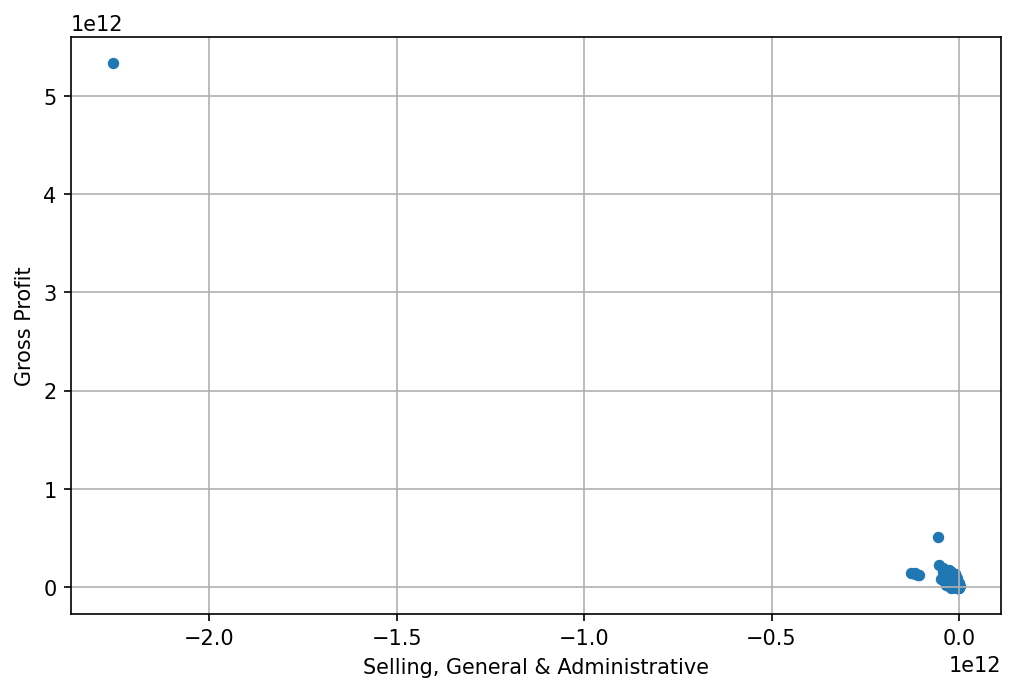

In [53]:
'''
We can understand a lot about the stock market with this data with some plots
Feel free to try different plots

Here I'm plotting the SG&A expense vs. the gross profit. 
We expect some kind of relationship between these.
'''

Income_Data.plot.scatter(x = 'Selling, General & Administrative', y = 'Gross Profit')
plt.grid()

## Exploring Some Companies From The Data

In [54]:
'''
Notice int he last plot that there is one company with a crazy high gross profit, 
yet having a very low SG&A spend, relatively speaking.

Any guesses for which company this is? And what year? Let's find out.
'''

Income_Data[['Ticker',
            'Currency',
            'Fiscal Year', 
            'Report Date',
            'Publish Date',
            'Restated Date',
            'Net Income',
            'Selling, General & Administrative',
            'Gross Profit']].sort_values(by='Gross Profit', ascending=False).head(10)

,Ticker,Currency,Fiscal Year,Report Date,Publish Date,Restated Date,Net Income,"Selling, General & Administrative",Gross Profit
9157,MULG,USD,2019,2019-12-31,2020-05-14,2021-04-15,2201565000000,-2.255977e+12,5.336070e+12
10220,PAAS,USD,2019,2019-12-31,2020-02-18,2021-02-18,111244000000,-5.541400e+10,5.094620e+11
931,AMZN,USD,2022,2022-12-31,2023-02-03,2024-02-02,-2722000000,-5.412900e+10,2.251520e+11
930,AMZN,USD,2021,2021-12-31,2022-02-04,2024-02-02,33364000000,-4.137400e+10,1.974780e+11
50,AAPL,USD,2022,2022-09-30,2022-10-28,2024-11-01,99803000000,-2.509400e+10,1.707820e+11
51,AAPL,USD,2023,2023-09-30,2023-11-03,2024-11-01,96995000000,-2.493200e+10,1.691480e+11
5963,GOOG,USD,2022,2022-12-31,2023-02-03,2024-01-31,59972000000,-4.229100e+10,1.566330e+11
49,AAPL,USD,2021,2021-09-30,2021-10-29,2023-11-03,94680000000,-2.197300e+10,1.528360e+11
929,AMZN,USD,2020,2020-12-31,2021-02-03,2023-02-03,21331000000,-2.867600e+10,1.527570e+11
14856,WMT,USD,2022,2023-01-31,2023-03-17,2024-03-15,11680000000,-1.271400e+11,1.475680e+11


In [55]:
# Not really surprising that it's Amazon, and that the top 10 includes Wall Mart and Apple.

In [56]:
# Let's take a look at some data from AMZN by itelf.
Income_Data[Income_Data['Ticker']=='AMZN']['Revenue']

928    2.805220e+11
929    3.860640e+11
930    4.698220e+11
931    5.139830e+11
Name: Revenue, dtype: float64

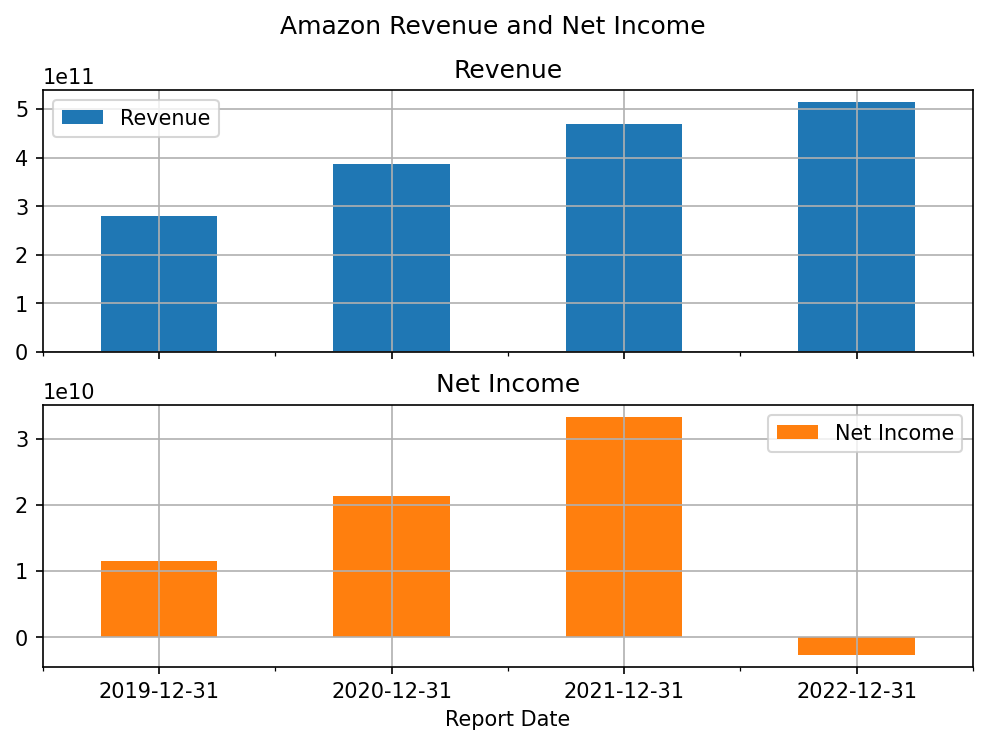

In [57]:
# We can plot this data and see how the revenue and income changed over time.
# Amazon seems to grow revenues steadily, but the income grows much faster proportionally.
# Documentation for bar charts is here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

Income_Data[Income_Data['Ticker']=='AMZN'].plot.bar(x='Report Date', 
                                                    y=['Revenue',
                                                       'Net Income'], 
                                                    rot=0, 
                                                    subplots=True,
                                                    grid='on',
                                                    title='Amazon Revenue and Net Income');

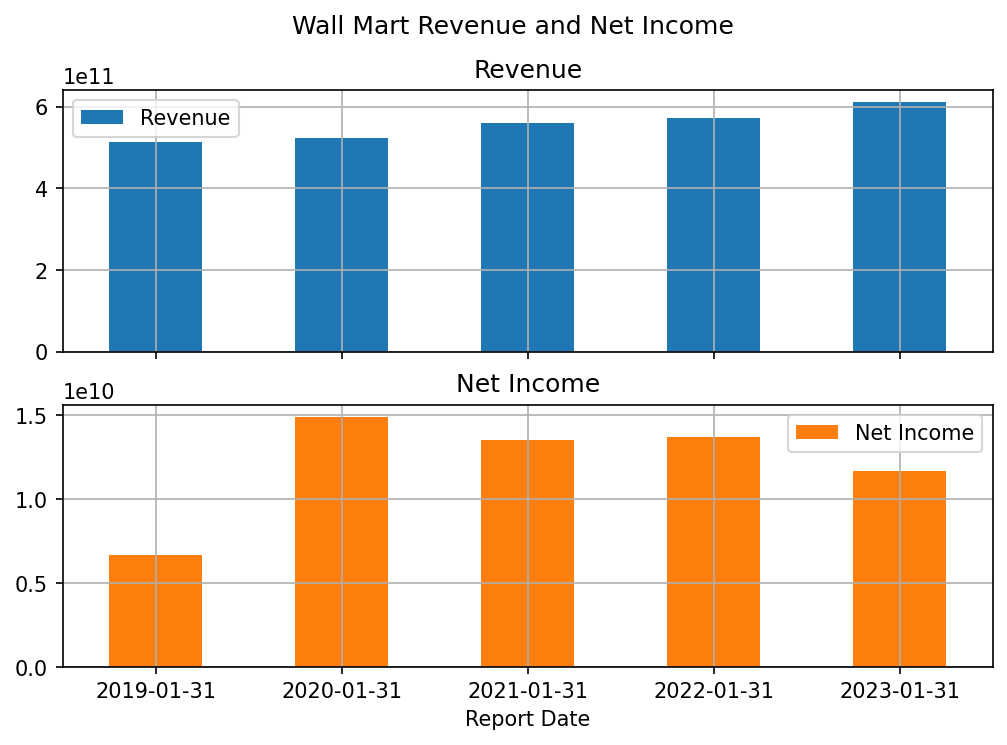

In [58]:
# Let's try a slow growth company, Wall Mart.
Income_Data[Income_Data['Ticker']=='WMT'].plot.bar(x='Report Date', 
                                                    y=['Revenue',
                                                       'Net Income'], 
                                                    rot=0, 
                                                    subplots=True,
                                                    grid='on',
                                                    title='Wall Mart Revenue and Net Income');

## Working Out A Market Capitalisation Figure Manually

In [59]:
'''
In fundamentals investing, you'll want an idea of the valuation of a company
relative to something else, e.g. the earnings, or the value of the assets.
This would be reflected in ratios like the Price/Earnings ratio, etc.
This requires a Market Cap figure, which we don't have currently.

We'll work out a market cap figure here manually, in the process trying out some pandas functions.

We'll do this for 2020 only, and to do it we will take the number of shares outstanding,
and multiply this by the share price at the time.

Bear in mind that the share prices and number of shares outstanding change over time,
so this market cap figure and any ratios derived from it will be rough numbers.

Another limitation is that there might not be a stock price reported for that specific day
and we aren't finding the closest days price to use at this point (we will do later).
''';

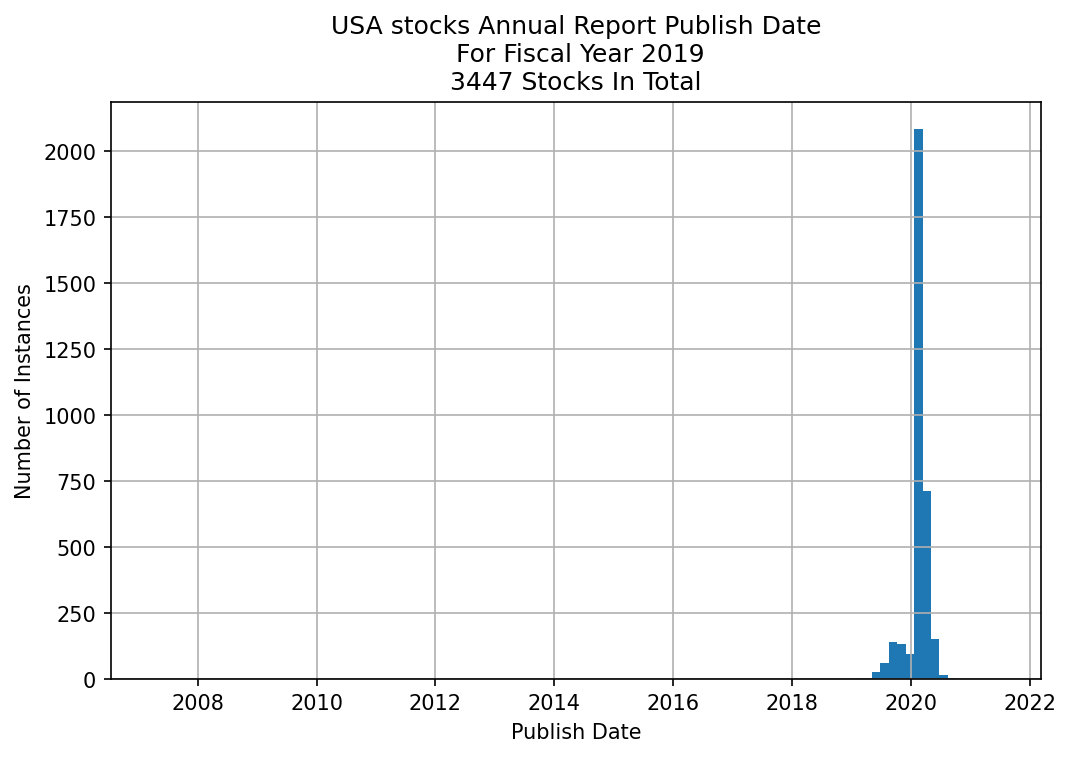

In [60]:
# Get the date format set correctly.
Income_Data['Publish Date']=pd.to_datetime(Income_Data['Publish Date'])

# Plot a histogram with a large number of bins to get an idea of when most reporting is done.
Income_Data[Income_Data['Fiscal Year'] == 2019]['Publish Date'].hist(bins=100);
plt.title('USA stocks Annual Report Publish Date\n For Fiscal Year 2019\n'+
          str(len(Income_Data[Income_Data['Fiscal Year'] == 2019]['Ticker'].unique()))+
          ' Stocks In Total');
plt.xlabel('Publish Date');
plt.ylabel('Number of Instances');

In [61]:
# Make a new dataframe of only the income data from 'Fiscal Year' == 2019.
Income_Data_2019 = Income_Data[Income_Data['Fiscal Year'] == 2019]

# View the series of company tickers that exist for that fiscal year.
(Income_Data[Income_Data['Fiscal Year'] == 2019]['Ticker']).unique

<bound method Series.unique of 0           A
5         A21
7          AA
14       AAGH
19       AAIC
         ... 
15285    ZUUS
15293     ZVO
15300    ZYME
15303    ZYNE
15307    ZYXI
Name: Ticker, Length: 3447, dtype: object>

In [62]:
# It appears as though most reporting is done just after the beginning of March for these companies.
# We need stock prices that correspond to that date (roughly).
# Filter the stock price dataframe for the beginning of March.
stock_prices_2019 = (stock_prices[stock_prices['Date'] == '2020-03-02'])
print('stock_prices_2019 dataframe shape is: ', stock_prices_2019.shape)
stock_prices_2019.head(10)

stock_prices_2019 dataframe shape is:  (4190, 11)


,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
282,A,45846,2020-03-02,77.31,82.00,77.24,81.97,79.38,3407549,NaN,3.096514e+08
1524,AA,367153,2020-03-02,14.02,14.03,13.11,13.73,13.29,6784053,NaN,1.859152e+08
5030,AAIC,9076064,2020-03-02,5.70,5.96,5.67,5.93,5.93,478404,NaN,3.662800e+07
6268,AAL,68568,2020-03-02,19.05,19.06,17.51,18.86,18.86,38737996,NaN,4.260587e+08
7510,AAMC,847094,2020-03-02,12.24,12.24,12.24,12.24,12.24,578,NaN,2.751960e+06
8752,AAME,450021,2020-03-02,2.48,2.61,2.16,2.61,2.53,1723,NaN,2.047216e+07
10766,AAOI,671827,2020-03-02,8.95,9.28,8.65,9.03,9.03,934741,NaN,2.023144e+07
12008,AAON,919501,2020-03-02,36.77,38.65,35.90,38.59,37.57,341421,NaN,7.813832e+07
13250,AAP,184955,2020-03-02,133.45,133.45,128.04,132.99,120.65,1402992,NaN,6.923814e+07
14492,AAPL,111052,2020-03-02,70.57,75.36,69.43,74.70,72.60,341397356,NaN,1.750192e+10


In [63]:
# Now checking the data before we do Shares Outstanding*Market Cap

# Number of fundamental stock data rows we have;
print(Income_Data[Income_Data['Fiscal Year'] == 2019]['Ticker'].shape[0])

# Number of stock price data rows we have:
print(stock_prices_2019.shape[0])

3447
4190


In [64]:
# Notice the size the fundamentals data and the stock price data don't match
# In the real work we frequently deal with imperfect data. 
# We will now cut down the data to make both dataframes correspond
# so that we can add a market cap column to create ratios like P/E, P/S etc.

In [65]:
# Use the .isin() dataframe function to first cut down the share prices dataframe to only contain stocks that are in the 
# Income statement dataframe.
stock_prices_2019 = stock_prices_2019[stock_prices_2019['Ticker'].isin(Income_Data_2019['Ticker'])]

# Do the same in the opposite direction. 
Income_Data_2019 = Income_Data_2019[Income_Data_2019['Ticker'].isin(stock_prices_2019['Ticker'])]
Income_Data_2019

# See the DataFrame
stock_prices_2019

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
282,A,45846,2020-03-02,77.31,82.00,77.24,81.97,79.38,3407549,NaN,309651359.0
1524,AA,367153,2020-03-02,14.02,14.03,13.11,13.73,13.29,6784053,NaN,185915242.0
5030,AAIC,9076064,2020-03-02,5.70,5.96,5.67,5.93,5.93,478404,NaN,36628000.0
6268,AAL,68568,2020-03-02,19.05,19.06,17.51,18.86,18.86,38737996,NaN,426058744.0
7510,AAMC,847094,2020-03-02,12.24,12.24,12.24,12.24,12.24,578,NaN,2751960.0
...,...,...,...,...,...,...,...,...,...,...,...
5712539,ZUO,994625,2020-03-02,13.33,13.45,12.45,12.98,12.98,2209692,NaN,115000000.0
5715223,ZVO,901866,2020-03-02,1.58,1.73,1.55,1.59,1.59,87392,NaN,30326538.0
5719586,ZYME,17663790,2020-03-02,41.29,41.74,39.25,41.34,41.34,519272,NaN,45518869.0
5720828,ZYNE,901704,2020-03-02,4.46,4.48,4.06,4.18,4.18,567752,NaN,23211391.0


In [66]:
Income_Data_2019 # Both stock_prices_2019 and Income_Data_2019 should have the same height

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,9.190000e+08,NaN,9.190000e+08,152000000.0,1071000000,NaN,1071000000,1071000000
7,AA,367153,USD,2019,FY,2019-12-31,2020-02-21,2022-02-24,185000000.0,185000000.0,...,-283000000.0,-121000000.0,5.930000e+08,-1.031000e+09,-4.380000e+08,-415000000.0,-853000000,NaN,-1125000000,-1125000000
19,AAIC,9076064,USD,2019,FY,2019-12-31,2020-02-24,2021-02-26,35709000.0,35833000.0,...,-97250000.0,-5050000.0,1.190300e+07,1.839000e+06,1.374200e+07,NaN,13742000,NaN,13742000,11142000
23,AAL,68568,USD,2019,FY,2019-12-31,2020-02-19,2022-02-22,443363000.0,444269000.0,...,-809000000.0,-968000000.0,2.256000e+09,NaN,2.256000e+09,-570000000.0,1686000000,NaN,1686000000,1686000000
27,AAMC,847094,USD,2019,FY,2019-12-31,2020-02-28,2021-03-03,2702918.0,2702918.0,...,6753000.0,NaN,-2.274240e+06,NaN,-1.039200e+07,-337973.0,-2616343,7944000.0,-2613000,-2819000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15281,ZUO,994625,USD,2019,FY,2020-01-31,2020-03-31,2022-03-28,111122000.0,111122000.0,...,2712000.0,2712000.0,-8.295300e+07,NaN,-8.295300e+07,-441000.0,-83394000,NaN,-83394000,-83394000
15293,ZVO,901866,USD,2019,FY,2019-12-31,2020-02-20,2021-02-24,29492000.0,29492000.0,...,1015000.0,NaN,-3.411700e+07,-2.146500e+07,-5.558200e+07,770000.0,-54812000,NaN,-54812000,-54812000
15300,ZYME,17663790,USD,2019,FY,2019-12-31,2020-03-02,2022-02-24,38022014.0,38022014.0,...,5282000.0,5877000.0,-1.459891e+08,-7.680000e+05,-1.460190e+08,582000.0,-145437000,NaN,-145437000,-145437000
15303,ZYNE,901704,USD,2019,FY,2019-12-31,2020-03-10,2022-03-01,22000203.0,22000203.0,...,1376227.0,1522138.0,-3.294358e+07,NaN,-3.294358e+07,NaN,-32943583,NaN,-32943583,-32943583


In [67]:
# We have lost some rows in our dataframes in keeping only common stock tickers.
# Arrange both income and stock price dataframes alphabetically so the rows correspond.
stock_prices_2019 = stock_prices_2019.sort_values(by=['Ticker'])
Income_Data_2019 = Income_Data_2019.sort_values(by=['Ticker'])

# Make the stock_data DataFrame from the Income Data and add a Market Cap series.
stock_data_2019 = Income_Data_2019
stock_data_2019['Market Cap'] = Income_Data_2019['Shares (Diluted)'].values * stock_prices_2019['Open'].values

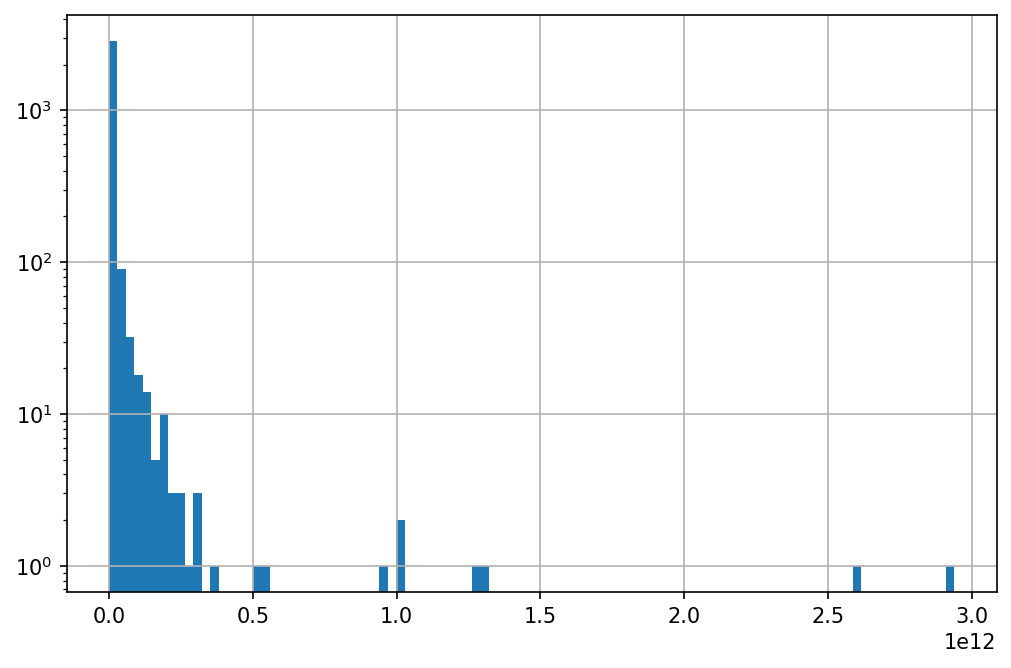

In [68]:
# Take a look at the distribution of Market Caps in the stock market with a histogram.
# use a large number of hisogram bins and a log scale, this will enable you to view the data better.
# You will see that there are many at the low end, and very few super large corporations in America

stock_data_2019['Market Cap'].hist(bins=100, log=True);
# Try to format this graph yourself with title, axis labels and so on.

## Finding Stocks With Market Cap, P/E Ratio Screens and More

In [69]:
# Let's see which companies are the largest by market cap.
stock_data_2019[['Ticker',
                'Currency',
                'Fiscal Year', 
                'Report Date',
                'Publish Date',
                'Restated Date',
                'Net Income',
                'Selling, General & Administrative',
                'Gross Profit',
                'Market Cap']].sort_values(by=['Market Cap'], 
                                             ascending=False).head(10)

,Ticker,Currency,Fiscal Year,Report Date,Publish Date,Restated Date,Net Income,"Selling, General & Administrative",Gross Profit,Market Cap
1069,APLE,USD,2019,2019-12-31,2020-02-24,2022-02-22,171917000,-2.561940e+08,7.621650e+08,2.939917e+12
5571,FUN,USD,2019,2019-12-31,2020-02-21,2022-02-18,172365000,-2.222520e+08,1.348661e+09,2.606636e+12
47,AAPL,USD,2019,2019-09-30,2019-10-31,2021-10-29,55256000000,-1.824500e+10,9.839200e+10,1.312295e+12
9049,MSFT,USD,2019,2019-06-30,2019-08-01,2021-07-29,39240000000,-2.309800e+10,8.293300e+10,1.281648e+12
2253,BRK-A,USD,2019,2019-12-31,2020-02-24,2022-02-28,81417000000,-1.922600e+10,5.223700e+10,1.026360e+12
5960,GOOG,USD,2019,2019-12-31,2020-02-04,2022-02-02,34343000000,-2.801500e+10,8.996100e+10,1.007054e+12
928,AMZN,USD,2019,2019-12-31,2020-01-31,2022-02-04,11588000000,-2.408100e+10,1.149860e+11,9.608256e+11
8659,META,USD,2019,2019-12-31,2020-01-30,2022-02-03,18485000000,-2.034100e+10,5.792700e+10,5.580303e+11
14187,V,USD,2019,2019-09-30,2019-11-14,2021-11-18,12080000000,-5.745000e+09,NaN,5.075823e+11
7430,JNJ,USD,2019,2019-12-31,2020-01-18,2022-02-17,15119000000,-2.217800e+10,5.450300e+10,3.617900e+11


In [70]:
'''
It's no surprise that AAPL and AMZN are present, 
earlier we found that they had the largest gross profits.

When picking stocks with fundamentals we would like the most bang/buck.

Let's create a P/E ratio, and find some stocks using that.
'''

"\nIt's no surprise that AAPL and AMZN are present, \nearlier we found that they had the largest gross profits.\n\nWhen picking stocks with fundamentals we would like the most bang/buck.\n\nLet's create a P/E ratio, and find some stocks using that.\n"

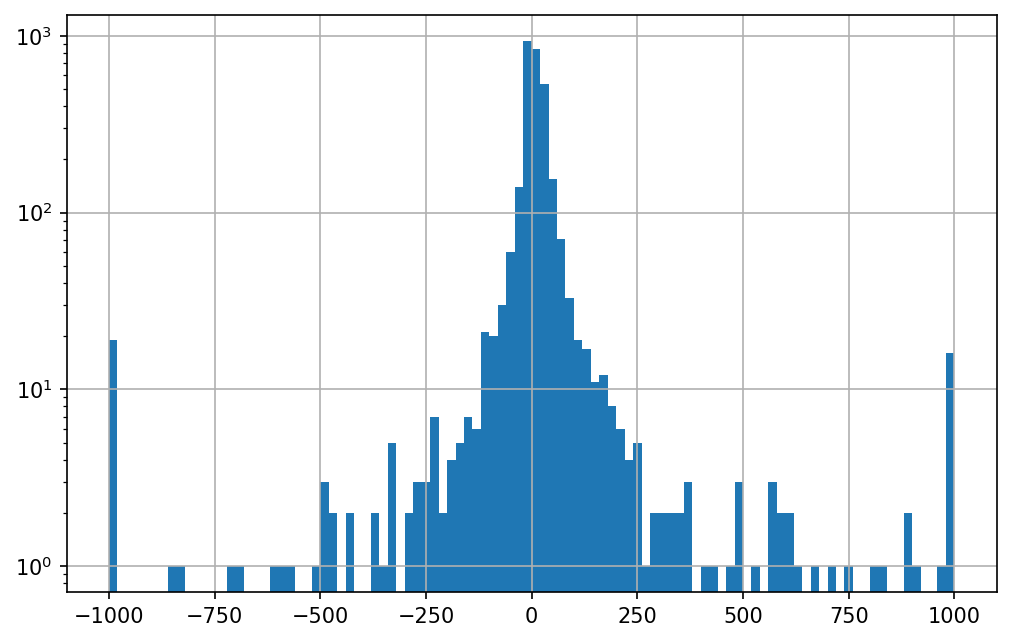

In [71]:
# Creating a P/E ratio, here we have clipped the result to +=1000.
stock_data_2019['P/E'] = (stock_data_2019['Market Cap']/stock_data_2019['Net Income']).clip(-1000,1000)
stock_data_2019['P/E'].hist(bins=100, log=True);

In [72]:
# Let's see which companies are lowest by P/E ratio.
# We want t remove stocks with P/E < 0 too.

stock_data_2019[['Ticker',
                'Currency',
                'Fiscal Year', 
                'Report Date',
                'Publish Date',
                'Restated Date',
                'Net Income',
                'Selling, General & Administrative',
                'Gross Profit',
                'Market Cap',
                'P/E']][stock_data_2019['P/E'] > 0].sort_values(by=['P/E'],
                                    ascending=True).head(10)

,Ticker,Currency,Fiscal Year,Report Date,Publish Date,Restated Date,Net Income,"Selling, General & Administrative",Gross Profit,Market Cap,P/E
1311,ASLE,USD,2019,2019-12-31,2020-03-02,2022-03-15,15499000,-5.981400e+07,8.504900e+07,3.763917e+05,0.024285
10220,PAAS,USD,2019,2019-12-31,2020-02-18,2021-02-18,111244000000,-5.541400e+10,5.094620e+11,3.136454e+09,0.028194
12081,SELF,USD,2019,2019-12-31,2020-03-30,2021-03-31,590619000,-2.126804e+09,5.090964e+09,4.004414e+07,0.067800
14675,WBD,USD,2019,2019-12-31,2020-02-27,2022-02-24,2069000000,-2.788000e+09,7.325000e+09,1.553400e+08,0.075080
4753,EOSS,USD,2019,2019-12-31,2020-04-16,2021-04-15,1081767,-9.058220e+05,2.014080e+06,8.680000e+04,0.080239
7118,IONM,USD,2019,2019-12-31,2020-03-29,2021-03-30,2541524,-9.862000e+06,1.277000e+07,3.943620e+05,0.155168
4683,ENO,USD,2019,2019-12-31,2020-02-02,2022-02-25,1258244000,NaN,7.656175e+09,2.168026e+08,0.172306
13212,TCOM,USD,2019,2019-12-31,2020-04-09,2022-04-27,7055000000,-1.258400e+10,2.829400e+10,2.457874e+09,0.348388
3166,CNLPL,USD,2019,2019-12-31,2020-02-27,2022-02-17,909053000,-1.363113e+09,5.486310e+09,3.651296e+08,0.401659
11459,RHE,USD,2019,2019-12-31,2020-03-27,2021-03-29,5500000,-3.192000e+06,NaN,2.346320e+06,0.426604


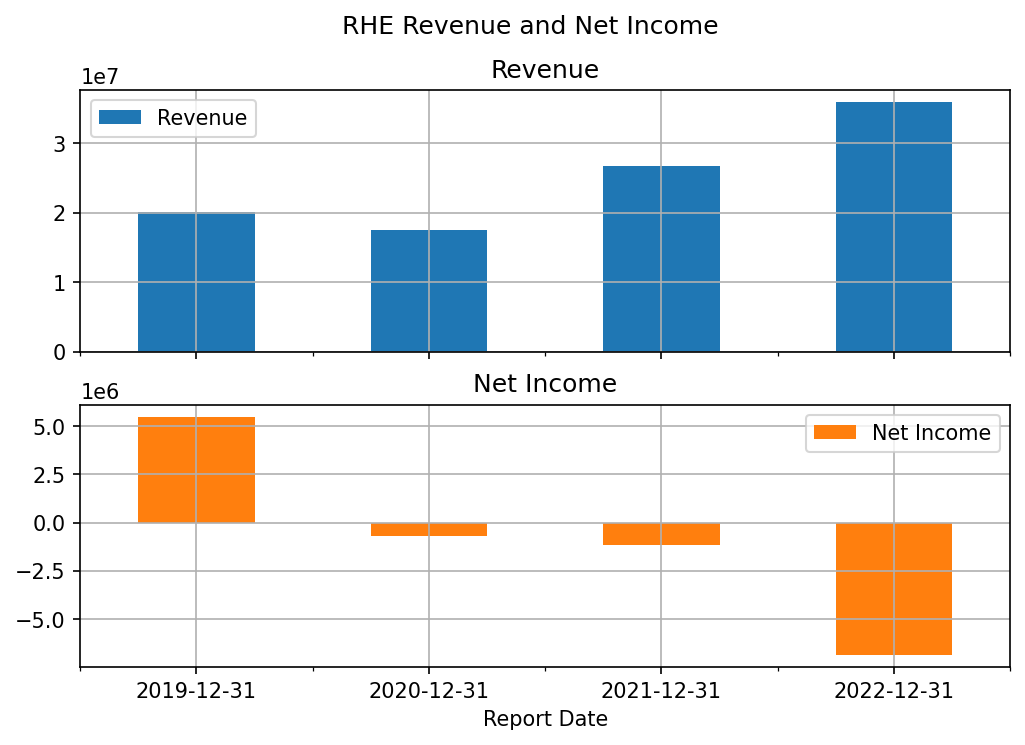

In [73]:
# There are some companies with a market cap of less than $10 million, which is very low.
# A lot of people consider these micro-cap stocks to be very risky, 
# so it might be a good idea to filter them out


# RHE is at the top of the list. 
# With a low P/E ratio, the market seems quite pessimistic abouyt this company.
# Let's see if that's justified by plotting the revenue and earnings over time.
Income_Data[Income_Data['Ticker']=='RHE'].plot.bar(x='Report Date', 
                                                    y=['Revenue',
                                                       'Net Income'], 
                                                    rot=0, 
                                                    subplots=True,
                                                    grid='on',
                                                    title='RHE Revenue and Net Income');

In [206]:
# The revenue seems to be declining steadily, which doesn't look good.
# The P/E is an obvious measure of value, so it's not a surprise that stocks with low P/E
# look pretty bad. 

End of Exercise 6.

# Pandas Data Reader

In [77]:
!pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=f9d04dbbe88b0dfe51eba5986a4bc13b47d2f28139f6a285adf2c48c4bc8994c
  Stored in directory: C:\Users\Damon\AppData\Local\Temp\pip-ephem-wheel-cache-scugk0w8\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [84]:
pip install git+https://github.com/ranaroussi/yfinance.git@hotfix/download-database-error

  Cloning https://github.com/ranaroussi/yfinance.git (to revision hotfix/download-database-error) to c:\users\damon\appdata\local\temp\pip-req-build-m5h82_qh
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [4]:
import pandas as pd
import pandas_datareader.data as pdr # Be sure this is installed from anaconda
from matplotlib import pyplot as plt
import yfinance as yf

In [8]:

def get_data_yahoo(Ticker, start, end):
    stock = yf.Ticker(Ticker)
    data = stock.history(start = start, end= end)
    data.index = pd.to_datetime(data.index.date)
    # Function implementation here
    return data
pdr.get_data_yahoo = get_data_yahoo

# Start and end dates
start = pd.to_datetime('2019-05-01')
end = pd.to_datetime('2020-05-01')

# Use the Pandas DataReader
#tickerData = pdr.DataReader('SPY', 'yahoo', start, end); # Sometimes things stop working. Such is life.

tickerData = pdr.get_data_yahoo("SPY", start, end)

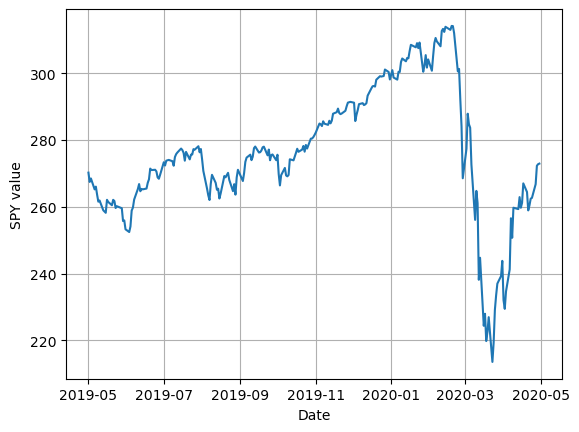

In [9]:
# Plot the data
plt.plot(tickerData['Open']);
plt.grid();
plt.xlabel('Date');
plt.ylabel('SPY value');

In [10]:
tickerData

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
2019-05-01,270.251938,270.462853,267.574348,267.583527,71671900,0.0,0.0,0.0
2019-05-02,267.464318,268.399654,265.483641,267.005829,65030200,0.0,0.0,0.0
2019-05-03,268.509696,269.903493,267.115870,269.619232,56543700,0.0,0.0,0.0
2019-05-06,265.236024,268.958954,264.915076,268.509644,107198100,0.0,0.0,0.0
2019-05-07,266.061390,266.666599,262.081705,264.025696,144729900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-04-24,262.683304,265.462379,260.596649,264.779297,85063200,0.0,0.0,0.0
2020-04-27,266.791062,269.738558,266.323204,268.596985,77896600,0.0,0.0,0.0
2020-04-28,272.311790,272.667366,267.053075,267.361877,105270000,0.0,0.0,0.0
2020-04-29,272.789028,275.923680,271.741032,274.361023,118745600,0.0,0.0,0.0


### iloc and loc

In [11]:
# .iloc[] selects rows like a list

In [12]:
tickerData.iloc[-5:] #last 5 rows

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
2020-04-24,262.683304,265.462379,260.596649,264.779297,85063200,0.0,0.0,0.0
2020-04-27,266.791062,269.738558,266.323204,268.596985,77896600,0.0,0.0,0.0
2020-04-28,272.311790,272.667366,267.053075,267.361877,105270000,0.0,0.0,0.0
2020-04-29,272.789028,275.923680,271.741032,274.361023,118745600,0.0,0.0,0.0
2020-04-30,272.957368,274.463884,270.037943,271.806458,122901700,0.0,0.0,0.0


In [13]:
tickerData.iloc[:5] #first 5 rows

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
2019-05-01,270.251938,270.462853,267.574348,267.583527,71671900,0.0,0.0,0.0
2019-05-02,267.464318,268.399654,265.483641,267.005829,65030200,0.0,0.0,0.0
2019-05-03,268.509696,269.903493,267.115870,269.619232,56543700,0.0,0.0,0.0
2019-05-06,265.236024,268.958954,264.915076,268.509644,107198100,0.0,0.0,0.0
2019-05-07,266.061390,266.666599,262.081705,264.025696,144729900,0.0,0.0,0.0


In [14]:
tickerData.iloc[207] # row 207

Open             2.922643e+02
High             2.959201e+02
Low              2.890271e+02
Close            2.897712e+02
Volume           1.947738e+08
Dividends        0.000000e+00
Stock Splits     0.000000e+00
Capital Gains    0.000000e+00
Name: 2020-02-26 00:00:00, dtype: float64

In [15]:
# .loc[] selects rows using the index. 
# With Timeseries data like this, the index is a date, not a number.
tickerData.loc['2019-05-01']

Open             2.702519e+02
High             2.704629e+02
Low              2.675743e+02
Close            2.675835e+02
Volume           7.167190e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
Capital Gains    0.000000e+00
Name: 2019-05-01 00:00:00, dtype: float64

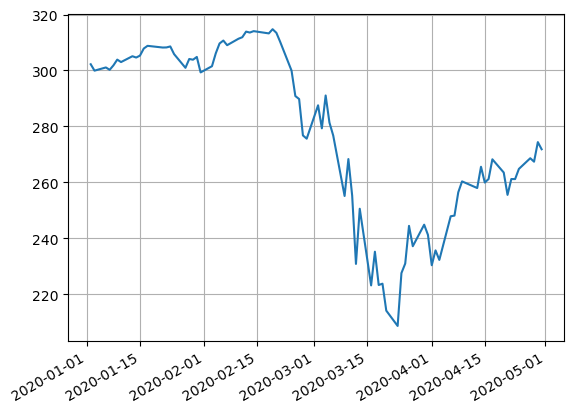

In [16]:
tickerData.loc[tickerData.index>'2020-01-01']['Close'].plot()
plt.grid() # Add a grid to the plot.